In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
bike=pd.read_csv(r'C:\Users\ADMIN\Downloads\day.csv')

### Reading the data

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
# checking null values and the data type
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
null_vals=bike.isnull().sum()
null_vals

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### we cross checked if any null values, so as we can see there are no null values in the data also the data types look apt except for dtetype which is date type column which is of object type so, we will check if it is apt or needs to be changed.

In [7]:
# checking statistical info of the data set
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Dropping unnecessary columns

In [8]:
# Now lets try to check all the columns and try to drop unnecessary columns before we proceed further.

In [9]:
# displaying all the columns
bike.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### From the data dictionary we can see that, we can drop instant column as it index, drop dteday column as the yr, month column have similar data, drop registered and casual as we can see registered + casual is nothing but cnt and we know the analysis is to be done on count column rather than specific category.So, will drop these columns and create an updated new df.

In [10]:

updated_bike=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [11]:
updated_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# further checking the data types in detail
updated_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### So, when we checked the data type are fine based on the data but when you check the data dictionary the columns season, month,weekday, weathersit are actually categorical variables but are haveing numerical data so we need to replace then with appropriate values.

In [13]:
# replacing categorical variables
updated_bike['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)
updated_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
updated_bike['mnth'].replace({1:'January',2:'Febuary',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'},inplace=True)
updated_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
updated_bike['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
updated_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
updated_bike['weathersit'].replace({1:"Clear_Few_Clouds",2:"Mist_cloudy",3:"Light_rain_snow_Thunderstorm",4:'Heavy_Rain_Ice_Pallets_Thunderstorm_Mist'},inplace=True)
updated_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear_Few_Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear_Few_Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear_Few_Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
updated_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#### Now we have done all imputations, checked for missing value, transformed the respective numeric variables to categoric, and also changed the respective required data types. So, before we proceed lets visualize the data and check if linear regresion is possible or not, if there is any multicollinearity and  any outliers and so on.

### Visualising Data

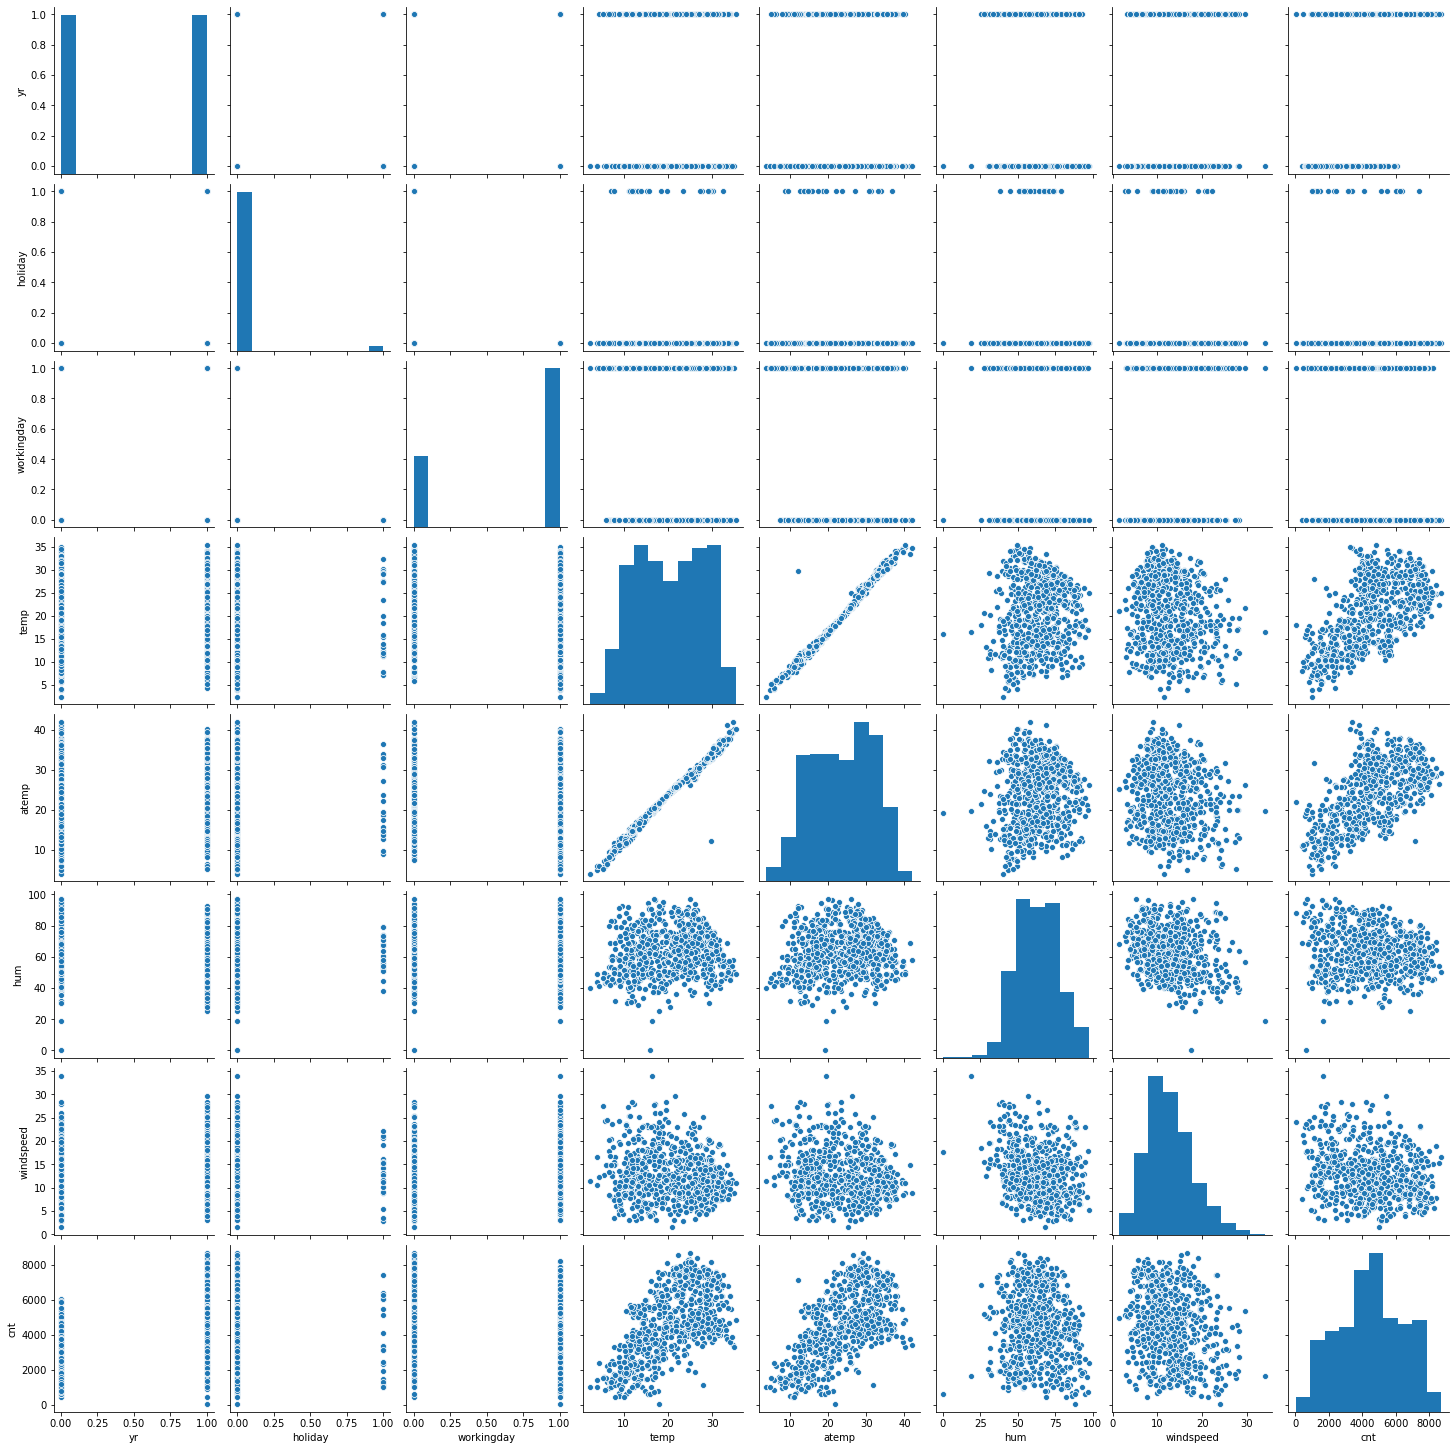

In [18]:
# EDA
# Lets check all the numeric variables
sns.pairplot(updated_bike)
plt.show()

#### So as we see the target variable cnt does have relation and and the histograms also don't look suspicious so we can perform linear regression. However, there are some variables that have multicolinearity lets check them.

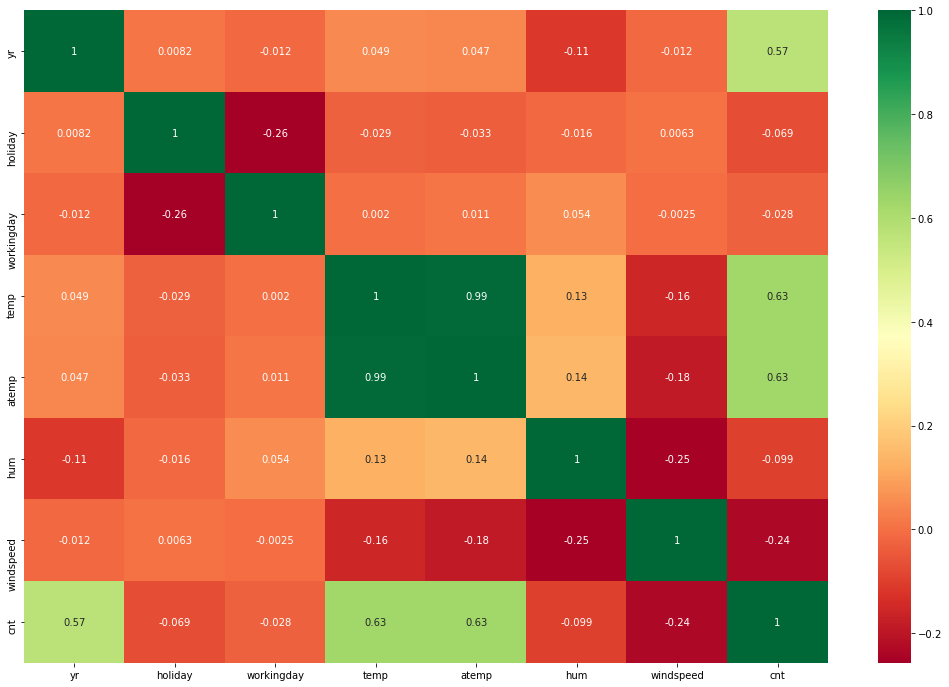

In [19]:
# Heatmap to check multi colinearity

plt.figure(figsize = (18, 12))
sns.heatmap(updated_bike.corr(), annot = True, cmap="RdYlGn")
plt.show()


#### So we can see temp and atemp is highly correlated which is almost to 1 so lets go ahead drop one of them.

In [20]:
# Dropping temp
updated_bike.drop(['temp'],axis=1,inplace=True)
updated_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear_Few_Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear_Few_Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear_Few_Clouds,11.46350,43.6957,12.522300,1600


Now lets go ahead and visualize the categorical variables

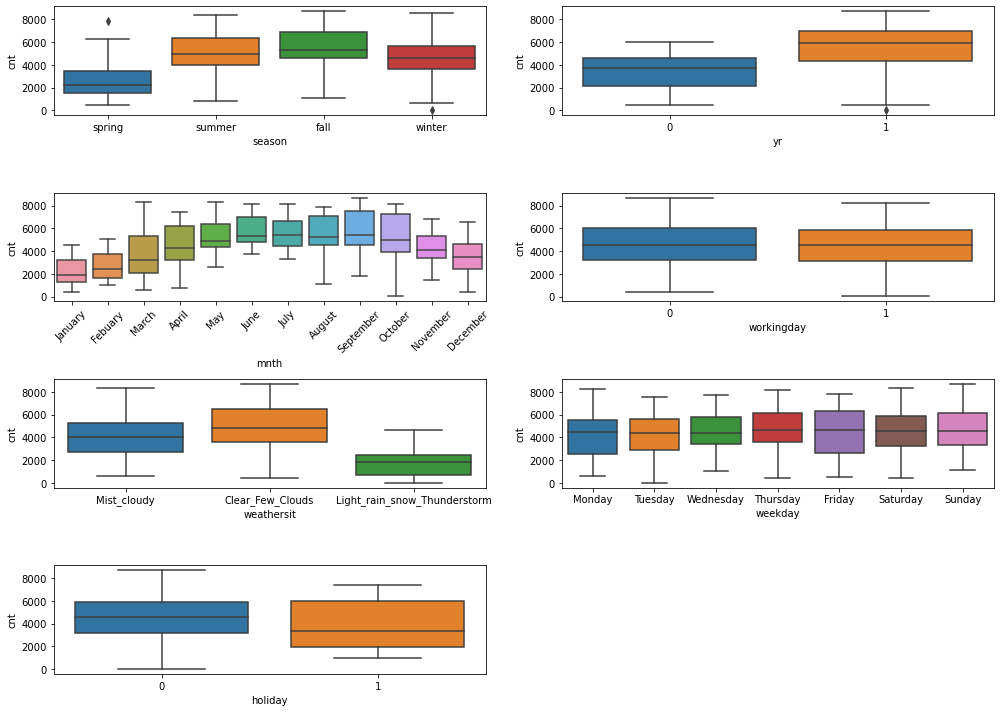

In [21]:
# boxplot of categorical variables

plt.figure(figsize=(14,10))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = updated_bike)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = updated_bike)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = updated_bike)
plt.xticks(rotation=45)
plt.subplot(4,2,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = updated_bike)
plt.subplot(4,2,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = updated_bike)
plt.subplot(4,2,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = updated_bike)
plt.subplot(4,2,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = updated_bike)
plt.tight_layout()
plt.show()

#### So we visualised and dont see any such outliers and also we can see how the target variable is varied with the respective other variables

### Creating dummies for categorical variables

In [22]:
# dummy creation

Seasons=pd.get_dummies(updated_bike['season'],drop_first=True)
Weather_conditions=pd.get_dummies(updated_bike['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(updated_bike['weekday'],drop_first=True)
Months=pd.get_dummies(updated_bike['mnth'],drop_first=True)

In [23]:
# lets concat this with the df

updated_bike=pd.concat([updated_bike,Seasons],axis=1)
updated_bike=pd.concat([updated_bike,Weather_conditions],axis=1)
updated_bike=pd.concat([updated_bike,Day_of_week],axis=1)
updated_bike=pd.concat([updated_bike,Months],axis=1)



In [24]:
updated_bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season                        730 non-null    object 
 1   yr                            730 non-null    int64  
 2   mnth                          730 non-null    object 
 3   holiday                       730 non-null    int64  
 4   weekday                       730 non-null    object 
 5   workingday                    730 non-null    int64  
 6   weathersit                    730 non-null    object 
 7   atemp                         730 non-null    float64
 8   hum                           730 non-null    float64
 9   windspeed                     730 non-null    float64
 10  cnt                           730 non-null    int64  
 11  spring                        730 non-null    uint8  
 12  summer                        730 non-null    uint8  
 13  winte

In [25]:
# now since the columns with dummies are created lets delete the original columns i.e.season.weathersit,weekday,mnth

updated_bike.drop(['season'],axis=1,inplace=True)
updated_bike.drop(['weathersit'],axis=1,inplace=True)
updated_bike.drop(['weekday'],axis=1,inplace=True)
updated_bike.drop(['mnth'],axis=1,inplace=True)

In [26]:
updated_bike.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,December,Febuary,January,July,June,March,May,November,October,September
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [27]:
#### So now we can proceed and split our data into train and test respectively

### Splitiing into train/test 

In [28]:
import sklearn
from sklearn.model_selection import train_test_split

df_train,df_test=train_test_split(updated_bike,train_size=0.7,test_size=0.3,random_state=100)

In [29]:
df_train.head(3)

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,December,Febuary,January,July,June,March,May,November,October,September
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [30]:
df_test.head(3)

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,December,Febuary,January,July,June,March,May,November,October,September
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [31]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


#### Now the splitting is done we need to rescale the data as some variables are having different scale and it will alter the interpretations.

### Rescaling


In [32]:
# Min-Max scaler 

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [33]:
# creating a list of numerical variables

num_vars=['atemp','hum','windspeed','cnt']


In [34]:
# fitting the data

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,December,Febuary,January,July,June,March,May,November,October,September
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,December,Febuary,January,July,June,March,May,November,October,September
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.453386,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### so we can see values have been scaled between 0 and 1. 

In [37]:
#CREATING X AND Y
y_train = df_train.pop('cnt')
X_train = df_train

In [38]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light_rain_snow_Thunderstorm,...,December,Febuary,January,July,June,March,May,November,October,September
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

#### so we see y_train has everything but cnt and X_train has only the cnt column. Now lets proceed to feature selection using the RFE approach.

In [40]:
# Feature selection using RFE approach
# importing libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
# lets start with 10 variables

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)            
rfe = rfe.fit(X_train, y_train)


In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 10),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light_rain_snow_Thunderstorm', True, 1),
 ('Mist_cloudy', False, 2),
 ('Monday', False, 14),
 ('Saturday', False, 8),
 ('Sunday', False, 9),
 ('Thursday', False, 18),
 ('Tuesday', False, 13),
 ('Wednesday', False, 16),
 ('August', True, 1),
 ('December', False, 5),
 ('Febuary', False, 4),
 ('January', False, 3),
 ('July', False, 15),
 ('June', False, 12),
 ('March', False, 19),
 ('May', False, 11),
 ('November', False, 6),
 ('October', False, 17),
 ('September', True, 1)]

In [43]:
# columns with support= True

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'summer', 'winter',
       'Light_rain_snow_Thunderstorm', 'August', 'September'],
      dtype='object')

In [44]:
# dropping the false

X_train.columns[~rfe.support_]
X_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Light_rain_snow_Thunderstorm', 'Mist_cloudy',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'August', 'December', 'Febuary', 'January', 'July', 'June', 'March',
       'May', 'November', 'October', 'September'],
      dtype='object')

### Model building

In [45]:
# building model using stats model
X_train_rfe = X_train[col]

In [46]:
# importing libraries
import statsmodels.api as sm  

In [47]:
X_train_lm1= sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_lm1).fit()

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.98e-183
Time:                        23:29:43   Log-Likelihood:                 487.06
No. Observations:                 510   AIC:                            -952.1
Df Residuals:                     499   BIC:                            -905.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [48]:
# Checking VIF for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,hum,10.26
2,atemp,8.55
4,windspeed,3.55
0,yr,2.01
5,summer,1.82
6,winter,1.73
8,August,1.54
9,September,1.30
7,Light_rain_snow_Thunderstorm,1.09
1,holiday,1.04


In [49]:
# column hum as high VIF value so lets drop it


In [50]:
# Dropping
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)



In [51]:
# recreating the model

X_train_lm2= sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_lm2).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          4.65e-168
Time:                        23:29:44   Log-Likelihood:                 447.96
No. Observations:                 510   AIC:                            -875.9
Df Residuals:                     500   BIC:                            -833.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [52]:
# Checking VIF for multicollinearity

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.89
3,windspeed,2.95
0,yr,2.00
4,summer,1.80
7,August,1.54
5,winter,1.47
8,September,1.29
6,Light_rain_snow_Thunderstorm,1.06
1,holiday,1.04


#### Our model looks fine as the pvalues are < 0.05 and so are the VIF < 5 and looks significant.so, lets keep this and proceed and check the errors are normally distributed or not .

### Residual analysis

In [53]:
# calculating resisdual 
y_train_pred = lm2.predict(X_train_lm2)
res = y_train-y_train_pred

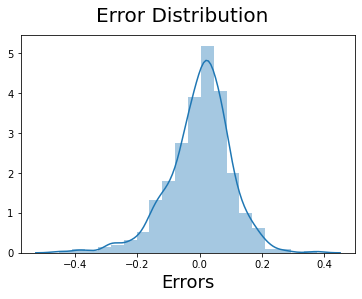

In [54]:
# Distplot of errors
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Distribution', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

In [55]:
print(X_train_lm2.shape)
print(res.shape)

(510, 10)
(510,)


#### Now since the error is normally distributed lets proceed with the model building of test data.So first we need to scale it.

### Test data prep

In [56]:
# Scalling test data

num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [57]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,December,Febuary,January,July,June,March,May,November,October,September
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [58]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,December,Febuary,January,July,June,March,May,November,October,September
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.481313,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
#Creating x and y sets

y_test = df_test.pop('cnt')
X_test = df_test

In [60]:
y_test.head(3)

184    0.692706
535    0.712034
299    0.303382
Name: cnt, dtype: float64

In [61]:
X_test.head(3)

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light_rain_snow_Thunderstorm,...,December,Febuary,January,July,June,March,May,November,October,September
184,0,1,0,0.769660,0.657364,0.084219,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,0.496145,0.837699,0.334206,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [62]:
#Selecting the variables that were part of final model.
X_test_sm=X_train_rfe.columns

X_test=X_test[X_test_sm]
# Adding a constant variable 
X_test_sm = sm.add_constant(X_test)



In [63]:
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   yr                            219 non-null    int64  
 2   holiday                       219 non-null    int64  
 3   atemp                         219 non-null    float64
 4   windspeed                     219 non-null    float64
 5   summer                        219 non-null    uint8  
 6   winter                        219 non-null    uint8  
 7   Light_rain_snow_Thunderstorm  219 non-null    uint8  
 8   August                        219 non-null    uint8  
 9   September                     219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 11.3 KB


In [64]:
#Making predictions on the chosen model
y_test_pred = lm2.predict(X_test_sm)


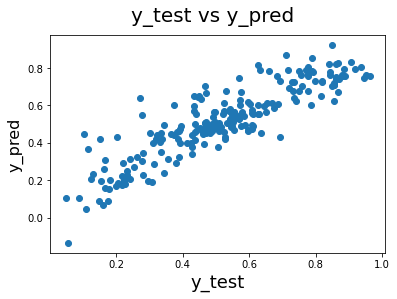

In [65]:
# checking y_test vs y_test_pred via scatter plot 

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)
plt.show()

#### So the model looks fine enough to make predictions

### Evaluating


In [66]:
# importing libraries

from sklearn.metrics import r2_score

In [67]:
# R sqaure
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7748525737132625

In [68]:
#  Adjusted R-squared 
r2=0.7748525737132625
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7651572299975657

#### So we can see our training model Rsquared is =0.799 and our adjusted R sqaured is = 0.796. Our Test model Rsqaured is = 0.775 and adjusted Rsqaured is =0.767 which is very close to each other so we can say our model is good and can be generalized for predictions

### Predictions

-  The Variables that influence mostly are Atemp i.e. feeling temperature in celcius as a change in 1 unit of this leads to increase in bike rental demand by 0.57 units
-  Weather conditions also affects the bike rental demand in  our case specifically we saw when it was light rain or snow or thunderstorm this would lead to decrease in demand by 25 units
-  The year also was a contrubuting factor as it showed year change increased demand by 23 units
-  few other factors were months, seasons and wind conditions as windy weather decreased demand, season such as summer increased demand by 12 units and month august,september also saw giveing rise to demand.
-  holiday also saw decrease in demand as people tend to stay home
-  Finally the bike rental company should concentrate more on temperature, weather conditons and year mostly to achieve maximum bookings.